     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d80f726aa1e0752c67a78ad1bae35f5d41c71962694f0b7aad267dc13e705faa
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


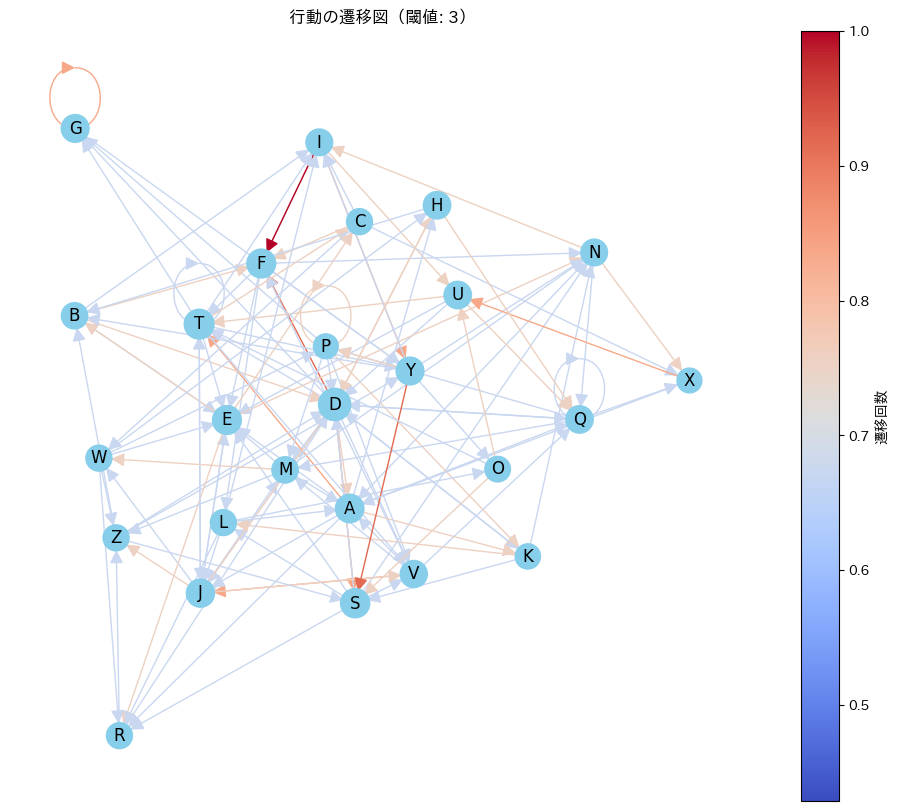

In [2]:
!pip install japanize-matplotlib
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import Counter
import matplotlib.colors as mcolors

# サンプルデータの作成
np.random.seed(0)  # 再現性のためシードを設定
num_samples = 1000
start_time = datetime(2023, 10, 26, 8, 45)
time_stamps = [start_time + timedelta(minutes=5*i) for i in range(num_samples)]
actions = np.random.choice([chr(i) for i in range(65, 91)], size=num_samples)  # AからZまで
users = np.random.choice(['User1', 'User2', 'User3'], size=num_samples)

data = {
    'Timestamp': time_stamps,
    'User': users,
    'Action': actions
}
df = pd.DataFrame(data)


df = df.sort_values("Timestamp")
actions = [df[df["User"]==user]["Action"].tolist() for user in df["User"].unique()]
# 行動の遷移をカウント
transitions = [(user_actions[i], user_actions[i+1]) for user_actions in actions for i in range(len(user_actions)-1)]
transition_counts = Counter(transitions)

# 行動の出現頻度をカウント
#action_counts = df.groupby('User')['Action'].value_counts()
action_counts = df['Action'].value_counts()

# 行動の遷移図をプロット
G = nx.DiGraph()

node_weight = 10
# 閾値を設定
threshold = 3

# 行動の遷移図をプロット
G = nx.DiGraph()

# 行動の遷移と遷移回数を追加（閾値以上のもののみ）
for (src, dst), count in transition_counts.items():
    if count >= threshold:
        G.add_edge(src, dst, weight=count)

# ネットワークグラフを可視化
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)  # ノードの位置を決定
edges = G.edges(data=True)
weights = [G[u][v]['weight'] for u, v, w in edges]
max_weight = max(weights, default=1)
#edge_colors = [plt.cm.coolwarm(weight / max_weight) for weight in weights]  # エッジの色を遷移回数に応じて設定
edge_colors = [plt.cm.coolwarm(weight/max_weight) for weight in weights]  # エッジの色を遷移回数に応じて設定
node_sizes = [action_counts.get(node, 0)*node_weight for node in G.nodes()]  # ノードの大きさを出現頻度に応じて設定
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
edges = nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color=edge_colors)
labels = nx.draw_networkx_labels(G, pos)
#plt.colorbar(plt.cm.ScalarMappable(norm=mcolors.Normalize(vmin=min(weights, default=0), vmax=max_weight), cmap='coolwarm'), ax=plt.gca(), orientation='vertical', label='遷移回数')
plt.colorbar(plt.cm.ScalarMappable(norm=mcolors.Normalize(vmin=min([weight/max_weight for weight in weights], default=0), vmax=1.0), cmap='coolwarm'), ax=plt.gca(), orientation='vertical', label='遷移回数')
plt.title('行動の遷移図（閾値: {}）'.format(threshold))
plt.axis('off')
plt.show()

In [3]:
# サンプルデータの作成
data = {
    'User': ['User1', 'User1', 'User1', 'User2', 'User2', 'User2'],
    'Action': ['A', 'B', 'C', 'A', 'B', 'C'],
    'Timestamp': pd.to_datetime(['2023-10-01 08:00:00', '2023-10-01 08:05:00', '2023-10-01 09:00:00',
                                 '2023-10-01 08:00:00', '2023-10-01 08:30:00', '2023-10-01 09:30:00'])
}
df = pd.DataFrame(data)

# セッションの閾値を設定（例：30分）
session_threshold = pd.Timedelta(minutes=30)

# セッションIDの初期化
df['SessionID'] = 0

# 各ユーザごとにセッションIDを割り当て
for user in df['User'].unique():
    user_actions = df[df['User'] == user]
    session_id = 0
    previous_timestamp = None
    for index, row in user_actions.iterrows():
        if previous_timestamp is None or (row['Timestamp'] - previous_timestamp) > session_threshold:
            session_id += 1
        df.at[index, 'SessionID'] = session_id
        previous_timestamp = row['Timestamp']

print(df)


    User Action           Timestamp  SessionID
0  User1      A 2023-10-01 08:00:00          1
1  User1      B 2023-10-01 08:05:00          1
2  User1      C 2023-10-01 09:00:00          2
3  User2      A 2023-10-01 08:00:00          1
4  User2      B 2023-10-01 08:30:00          1
5  User2      C 2023-10-01 09:30:00          2
